In [1]:
import os, sys
# import sklearn as skl 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

In [2]:
business_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=0)
business_df.keys()

Index(['name1', 'name2', 'addr1', 'addr2', 'addr3', 'addr4', 'postcode',
       'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip', 'baddr1', 'baddr2',
       'baddr3', 'baddr4', 'prop_postcode', 'empty_prop', 'empty_from'],
      dtype='object')

In [3]:
business_df=business_df.drop(['addr1','addr2','addr3','addr4','postcode','baddr1', 'baddr2',
       'baddr3', 'baddr4','prop_postcode'],axis=1)

In [4]:
business_df['prop'].value_counts().head()

4655103    1
2811174    1
2637109    1
2783042    1
2723123    1
Name: prop, dtype: int64

In [5]:
balance_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=1)
balance_df.head(2)

,propref,fin_year,status,account_id,check_digit,account_holder1,account_holder2,paymeth_code,trans_code,bill_no,...,last_payment,fullaccountref,account_bal,name1,name2,addr1,addr2,addr3,addr4,postcode
0,1001001,200910,NaN,60105948,X,MR ROYSTON LE COINTE,NaN,DDM01,DD,9,...,2011-10-26,60105948X,2.00,NaN,NaN,2ND FLR UNIT 201 COLOURWORKS,2 ABBOT STREET,LONDON,NaN,E8 3DP
1,1001001,201718,,60179497,5,DMD CAPITAL LIMITED,NaN,CSM01,SORD,1,...,2018-02-14,601794975,-97.01,NaN,NaN,2ND FLR UNIT 201 COLOURWORKS,2 ABBOT STREET,LONDON,NaN,E8 3DP


In [6]:
balance_df['name2'].value_counts()

Series([], Name: name2, dtype: int64)

In [7]:
balance_df.keys()

Index(['propref', 'fin_year', 'status', 'account_id', 'check_digit',
       'account_holder1', 'account_holder2', 'paymeth_code', 'trans_code',
       'bill_no', 'bill_bal', 'last_payment', 'fullaccountref', 'account_bal',
       'name1', 'name2', 'addr1', 'addr2', 'addr3', 'addr4', 'postcode'],
      dtype='object')

In [8]:
balance_df=balance_df.drop(['account_holder1','account_holder2','name1', 'name2', 'addr1', 'addr2', 'addr3', 'addr4', 'postcode'],axis=1)
balance_df.head(2)

,propref,fin_year,status,account_id,check_digit,paymeth_code,trans_code,bill_no,bill_bal,last_payment,fullaccountref,account_bal
0,1001001,200910,NaN,60105948,X,DDM01,DD,9,2.00,2011-10-26,60105948X,2.00
1,1001001,201718,,60179497,5,CSM01,SORD,1,-96.99,2018-02-14,601794975,-97.01


In [9]:
address_df = pd.read_excel('NNDR_for_Joe.xlsx',sheet_name=2)
address_df.head(2)

,UPRN,organisation,start_date,entry_date,last_update_date,end_date,address,postcode_master,nndr_prop_ref,llpg_usage,Ward
0,10008223002,GUNNERS NEWSAGENTS,20060214,20060214,20170823,0,"GUNNERS NEWSAGENTS, 33 BLACKSTOCK ROAD, HACKNE...",N4 2JF,1329285,"Commercial, Retail, Shop / Showroom",BROWNSWOOD
1,10008223003,NaN,20060214,20060214,20150218,0,"127 BLACKSTOCK ROAD, HACKNEY, LONDON, N4 2JW",N4 2JW,1329861,"Commercial, Retail, Shop / Showroom",BROWNSWOOD


In [10]:
address_df.keys()

Index(['UPRN', 'organisation', 'start_date', 'entry_date', 'last_update_date',
       'end_date', 'address', 'postcode_master', 'nndr_prop_ref', 'llpg_usage',
       'Ward'],
      dtype='object')

In [11]:
address_df = address_df.drop(['organisation', 'address'],axis=1)

### Now merging dataframes: making sure the matching key is the same format in both dataframes

In [12]:
business_df['prop']=business_df['prop'].apply(str)
business_df['prop'].head()

0    4611210
1    1515103
2    2121408
3    4055035
4    2759032
Name: prop, dtype: object

In [13]:
address_df['nndr_prop_ref']=address_df['nndr_prop_ref'].apply(str)
address_df['nndr_prop_ref'].head(5)

0    1329285
1    1329861
2    3284130
3    1619238
4    2447098
Name: nndr_prop_ref, dtype: object

In [14]:
combined_df = pd.merge(business_df, address_df,  how = 'left', left_on = 'prop', right_on = 'nndr_prop_ref')

In [15]:
combined_df.head(2)

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
0,!K7 RECORDS GMBH,NaN,60161467,8,4611210,11500,WORKSHOP AND PREMISES,NaN,NaT,1.000833e+10,20121001.0,20121001.0,20141006.0,0.0,E8 3FN,4611210,"Commercial, Industrial, Workshop / Light Indus...",LONDON FIELDS
1,& SMITH LIMITED,NaN,60162485,3,1515103,19500,OFFICES AND PREMISES,Y,2001-09-08,1.000824e+10,20060214.0,20060214.0,20121017.0,0.0,N16 9AE,1515103,"Commercial, Offices, Offices and work studios",CLISSOLD


In [16]:
combined_df.shape

(10861, 18)

In [17]:
business_df.shape, address_df.shape

((10823, 9), (13126, 9))

In [18]:
balance_df.shape

(26686, 12)

In [19]:
combined_df2 = pd.merge(combined_df, balance_df,  how = 'left', left_on = 'acct_id', right_on = 'account_id', suffixes =['','_2'])
combined_df2.shape

(14179, 30)

In [20]:
combined_df2.columns

Index(['name1', 'name2', 'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip',
       'empty_prop', 'empty_from', 'UPRN', 'start_date', 'entry_date',
       'last_update_date', 'end_date', 'postcode_master', 'nndr_prop_ref',
       'llpg_usage', 'Ward', 'propref', 'fin_year', 'status', 'account_id',
       'check_digit', 'paymeth_code', 'trans_code', 'bill_no', 'bill_bal',
       'last_payment', 'fullaccountref', 'account_bal'],
      dtype='object')

In [21]:
# print(address_df.shape)
print(address_df['nndr_prop_ref'].value_counts().head(3))

nan        1018
4749202       4
1943742       3
Name: nndr_prop_ref, dtype: int64


In [22]:
address_df[address_df['nndr_prop_ref']=='4749202']

,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
3207,10008309586,20070213,20070213,20171002,0,N4 2SH,4749202,"Commercial, Education, Primary, Junior, Infant...",WOODBERRY DOWN
3489,10008313946,20071018,20071018,20121017,0,N4 2TW,4749202,"Commercial, Education, Secondary School",WOODBERRY DOWN
8509,10008463792,20060424,20060424,20121017,0,N4 2TW,4749202,"Commercial, Education, Nursery/creche",WOODBERRY DOWN
11245,100023186270,20060214,20060214,20150218,0,N4 2TW,4749202,"Commercial, Education, Primary, Junior, Infant...",WOODBERRY DOWN


In [23]:
combined_df[combined_df['nndr_prop_ref']=='4749202']

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
688,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01,1.000831e+10,20070213.0,20070213.0,20171002.0,0.0,N4 2SH,4749202,"Commercial, Education, Primary, Junior, Infant...",WOODBERRY DOWN
689,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01,1.000831e+10,20071018.0,20071018.0,20121017.0,0.0,N4 2TW,4749202,"Commercial, Education, Secondary School",WOODBERRY DOWN
690,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01,1.000846e+10,20060424.0,20060424.0,20121017.0,0.0,N4 2TW,4749202,"Commercial, Education, Nursery/creche",WOODBERRY DOWN
691,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01,1.000232e+11,20060214.0,20060214.0,20150218.0,0.0,N4 2TW,4749202,"Commercial, Education, Primary, Junior, Infant...",WOODBERRY DOWN


In [24]:
business_df[business_df['prop']=='4749202']

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from
684,BEIS CHINUCH LEBONOS LIMITED,NaN,60112482,3,4749202,33250,SCHOOL AND PREMISES,Y,1999-04-01


In [25]:
address_df[address_df['nndr_prop_ref']=='1943742']       

,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
8466,10008463072,20060424,20060424,20141117,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK
8467,10008463073,20060424,20060424,20141117,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK
8618,100021036411,20060214,20060214,20121017,0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK


In [26]:
business_df[business_df['prop']=='1943742']

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from
9708,THE HEAD TEACHER,NaN,60087672,8,1943742,97000,SCHOOL AND PREMISES,NaN,NaT


In [27]:
combined_df[combined_df['nndr_prop_ref']=='1943742']

,name1,name2,acct_id,ck,prop,rv,vo_propdescrip,empty_prop,empty_from,UPRN,start_date,entry_date,last_update_date,end_date,postcode_master,nndr_prop_ref,llpg_usage,Ward
9738,THE HEAD TEACHER,NaN,60087672,8,1943742,97000,SCHOOL AND PREMISES,NaN,NaT,1.000846e+10,20060424.0,20060424.0,20141117.0,0.0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK
9739,THE HEAD TEACHER,NaN,60087672,8,1943742,97000,SCHOOL AND PREMISES,NaN,NaT,1.000846e+10,20060424.0,20060424.0,20141117.0,0.0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK
9740,THE HEAD TEACHER,NaN,60087672,8,1943742,97000,SCHOOL AND PREMISES,NaN,NaT,1.000210e+11,20060214.0,20060214.0,20121017.0,0.0,E5 0EG,1943742,"Commercial, Education, Primary, Junior, Infant...",KINGS PARK


In [28]:
combined_df2.keys()

Index(['name1', 'name2', 'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip',
       'empty_prop', 'empty_from', 'UPRN', 'start_date', 'entry_date',
       'last_update_date', 'end_date', 'postcode_master', 'nndr_prop_ref',
       'llpg_usage', 'Ward', 'propref', 'fin_year', 'status', 'account_id',
       'check_digit', 'paymeth_code', 'trans_code', 'bill_no', 'bill_bal',
       'last_payment', 'fullaccountref', 'account_bal'],
      dtype='object')

In [29]:
combined_df2.fin_year.value_counts()

201819.0    7695
201718.0    1366
201617.0     757
201516.0     414
201415.0     251
201011.0     213
201112.0     196
201314.0     159
201213.0     155
200910.0      64
200809.0      46
200708.0      42
200607.0      34
200102.0      11
199798.0      10
199697.0       9
199899.0       7
200203.0       7
199596.0       6
200506.0       5
200304.0       5
200001.0       4
199900.0       2
200405.0       1
Name: fin_year, dtype: int64

In [30]:
combined_df3=combined_df2[combined_df2['fin_year']==201718.0]

In [31]:
combined_df3.shape

(1366, 30)

In [32]:
combined_df3.keys()

Index(['name1', 'name2', 'acct_id', 'ck', 'prop', 'rv', 'vo_propdescrip',
       'empty_prop', 'empty_from', 'UPRN', 'start_date', 'entry_date',
       'last_update_date', 'end_date', 'postcode_master', 'nndr_prop_ref',
       'llpg_usage', 'Ward', 'propref', 'fin_year', 'status', 'account_id',
       'check_digit', 'paymeth_code', 'trans_code', 'bill_no', 'bill_bal',
       'last_payment', 'fullaccountref', 'account_bal'],
      dtype='object')

In [33]:
combined_df3['vo_propdescrip'].str.upper();

In [34]:
combined_df3.Ward.value_counts()

HOXTON EAST AND SHOREDITCH    219
LONDON FIELDS                 115
DALSTON                        99
HOXTON WEST                    84
STOKE NEWINGTON                79
HAGGERSTON                     76
LEA BRIDGE                     70
HOMERTON                       64
HACKNEY WICK                   56
HACKNEY CENTRAL                51
CLISSOLD                       48
SHACKLEWELL                    45
SPRINGFIELD                    37
DE BEAUVOIR                    34
HACKNEY DOWNS                  28
CAZENOVE                       22
STAMFORD HILL WEST             22
BROWNSWOOD                     20
VICTORIA                       17
WOODBERRY DOWN                 14
KINGS PARK                      9
Name: Ward, dtype: int64

In [35]:
#'start_date', 'entry_date', 'last_update_date',

In [36]:
# categorical: vo_propdescrip, empty_prop, 'llpg_usage', 'Ward','paymeth_code', 
# real-valued: .rv,  'bill_no',

#  real-valued: RV = rates value in GBP, number of bill (ie how long renting)
#  categorical: property description, whether its empty, how its used, ward its in, payment method 

combined_df4 = combined_df3[['rv','vo_propdescrip','empty_prop', 
                   'llpg_usage', 'Ward', 'paymeth_code','bill_no', 'account_bal', 'bill_bal']]

In [37]:
combined_df4.keys()

Index(['rv', 'vo_propdescrip', 'empty_prop', 'llpg_usage', 'Ward',
       'paymeth_code', 'bill_no', 'account_bal', 'bill_bal'],
      dtype='object')

In [38]:
combined_df4['empty_prop']=combined_df4['empty_prop'].fillna(0)
combined_df4['empty_prop']=combined_df4['empty_prop'].replace(['Y','V'],1)
combined_df4.head()

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,rv,vo_propdescrip,empty_prop,llpg_usage,Ward,paymeth_code,bill_no,account_bal,bill_bal
10,11500,CLUB AND PREMISES,0,"Commercial, Leisure, Licensed private members’...",HACKNEY WICK,CSM01,22.0,10111.20,1101.70
22,9400,SHOP AND PREMISES,1,"Commercial, Retail, Fast food outlets / takeaw...",HOMERTON,CSM01,1.0,5514.28,1739.03
35,79500,OFFICES AND PREMISES,0,"Commercial, Offices, Offices and work studios",HOXTON EAST AND SHOREDITCH,DDM01,1.0,33087.00,3303.00
76,5900,"LAND USED FOR STORAGE, CAR SPACES AND PREMISES",0,"Commercial, Transport, Railway assets",HAGGERSTON,CSM01,2.0,5171.23,1710.60
85,5400,OFFICES AND PREMISES,0,"Commercial, Offices, Offices and work studios",CAZENOVE,CSM01,1.0,1634.50,797.50


In [39]:
combined_df4['bin_label']=combined_df4['bill_bal'].apply(lambda x: 1 if float(x)<0 else 0)
combined_df4['bin_label'].value_counts()

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    1057
1     309
Name: bin_label, dtype: int64

#### Dealing with too many different values in categorical data: llpg_usage and vo_propdescrip

In [40]:
combined_df5 = combined_df4.copy()
threshold=20

counts = combined_df5['llpg_usage'].value_counts()
repl = counts[counts <= threshold].index
# list of uncommon values to be created, taken by indexing the value_counts where count is sub-threshold
combined_df5['llpg_usage']=combined_df5['llpg_usage'].replace(repl, 'Other')
# combined_df5

In [41]:
counts = combined_df5['vo_propdescrip'].value_counts()
repl = counts[counts <= threshold].index
combined_df5['vo_propdescrip']=combined_df5['vo_propdescrip'].replace(repl, 'Other')
# combined_df5

In [42]:
ward_crosstab = pd.crosstab(combined_df4['Ward'],combined_df4['bin_label'])
ward_crosstab['neg_pctg']=ward_crosstab[1]/ward_crosstab[0]*100
ward_crosstab[ward_crosstab[1]>3].sort_values('neg_pctg',ascending=False)

bin_label,0,1,neg_pctg
Ward,,,
KINGS PARK,4,5,125.000000
HAGGERSTON,44,32,72.727273
BROWNSWOOD,12,8,66.666667
WOODBERRY DOWN,9,5,55.555556
VICTORIA,11,6,54.545455
HOXTON WEST,57,27,47.368421
HOXTON EAST AND SHOREDITCH,155,64,41.290323
CLISSOLD,34,14,41.176471
SHACKLEWELL,34,11,32.352941


In [43]:
usage_ct = pd.crosstab(combined_df5['llpg_usage'],combined_df5['bin_label'])
usage_ct['neg_pctg']=usage_ct[1]/usage_ct[0]*100
usage_ct.sort_values('neg_pctg',ascending=False)

bin_label,0,1,neg_pctg
llpg_usage,,,
"Commercial, Transport, Car Parking / Park And Ride Site",21,16,76.190476
Other,113,55,48.672566
"Commercial, Industrial, Warehouse / Store / Storage Depot",64,22,34.375000
"Commercial, Offices, Offices and work studios",301,98,32.558140
"Commercial, Retail, Shop / Showroom",244,74,30.327869
"Commercial, Retail, Restaurant / Cafeteria",47,11,23.404255
"Commercial, Industrial, Workshop / Light Industrial",116,27,23.275862


In [44]:
descrip_ct =  pd.crosstab(combined_df5['vo_propdescrip'],combined_df5['bin_label'])
descrip_ct['neg_pctg']=descrip_ct[1]/(descrip_ct[0]+descrip_ct[1])*100
descrip_ct.sort_values('neg_pctg',ascending=False)

bin_label,0,1,neg_pctg
vo_propdescrip,,,
Other,228,101,30.699088
OFFICES AND PREMISES,124,51,29.142857
WAREHOUSE AND PREMISES,18,7,28.000000
SHOP AND PREMISES,215,69,24.295775
STORE AND PREMISES,42,12,22.222222
WORKSHOP AND PREMISES,96,22,18.644068
RESTAURANT AND PREMISES,27,5,15.625000
Offices and Premises,156,25,13.812155
Shop and Premises,33,5,13.157895




Let's see how many different features are required for each feature that we want to one-hot encode

In [45]:
for i in ['vo_propdescrip','empty_prop', 
                   'llpg_usage', 'Ward', 'paymeth_code']:
    print(i,(pd.get_dummies(combined_df4, columns=[i])).shape)

vo_propdescrip (1366, 140)
empty_prop (1366, 11)
llpg_usage (1366, 50)
Ward (1366, 30)
paymeth_code (1366, 17)


Too many dummy variables are required for prop description and usage - ie too many diff values. So don't use these

In [46]:
dummies_df = pd.get_dummies(combined_df4, columns=['Ward', 'paymeth_code'])
dummies_df = dummies_df.drop(['vo_propdescrip','llpg_usage'],axis=1)

In [47]:
(dummies_df.keys())

Index(['rv', 'empty_prop', 'bill_no', 'account_bal', 'bill_bal', 'bin_label',
       'Ward_BROWNSWOOD', 'Ward_CAZENOVE', 'Ward_CLISSOLD', 'Ward_DALSTON',
       'Ward_DE BEAUVOIR', 'Ward_HACKNEY CENTRAL', 'Ward_HACKNEY DOWNS',
       'Ward_HACKNEY WICK', 'Ward_HAGGERSTON', 'Ward_HOMERTON',
       'Ward_HOXTON EAST AND SHOREDITCH', 'Ward_HOXTON WEST',
       'Ward_KINGS PARK', 'Ward_LEA BRIDGE', 'Ward_LONDON FIELDS',
       'Ward_SHACKLEWELL', 'Ward_SPRINGFIELD', 'Ward_STAMFORD HILL WEST',
       'Ward_STOKE NEWINGTON', 'Ward_VICTORIA', 'Ward_WOODBERRY DOWN',
       'paymeth_code_CSH12', 'paymeth_code_CSHY', 'paymeth_code_CSM01',
       'paymeth_code_CSQ01', 'paymeth_code_DD12', 'paymeth_code_DD14',
       'paymeth_code_DDD14', 'paymeth_code_DDM01'],
      dtype='object')

Make a dictionary to store names of variables with their indices

In [48]:
feats_dict = dict()
for i, name in enumerate(dummies_df.keys()):
    feats_dict[i] = name 
# feats_dict

In [49]:
y = combined_df4[['bin_label']].copy()
X = dummies_df.drop(['bin_label','account_bal','bill_bal'], axis=1)

Feature ranking:
1. 	 rv                              (0.508691)
2. 	 bill_no                         (0.255622)
3. 	 empty_prop                      (0.028827)
4. 	 paymeth_code_DD12               (0.022776)
5. 	 Ward_HACKNEY CENTRAL            (0.019434)
6. 	 Ward_HACKNEY WICK               (0.017492)
7. 	 Ward_WOODBERRY DOWN             (0.017376)
8. 	 Ward_HAGGERSTON                 (0.012091)
9. 	 Ward_HOXTON EAST AND SHOREDITCH  (0.009939)
10. 	 Ward_SHACKLEWELL                (0.009821)
11. 	 Ward_STOKE NEWINGTON            (0.007099)
12. 	 Ward_HOXTON WEST                (0.007042)
13. 	 Ward_HACKNEY DOWNS              (0.006822)
14. 	 bin_label                       (0.006564)
15. 	 Ward_SPRINGFIELD                (0.006005)
16. 	 Ward_DE BEAUVOIR                (0.005976)
17. 	 Ward_KINGS PARK                 (0.005502)
18. 	 Ward_BROWNSWOOD                 (0.005449)
19. 	 Ward_DALSTON                    (0.005413)
20. 	 Ward_CLISSOLD                   (0.005305)
21. 	 accou

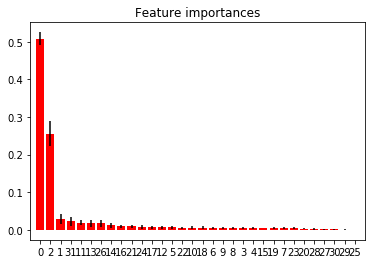

In [50]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y['bin_label'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. \t {} {} ({:3f})".format(f + 1, feats_dict[indices[f]], ' '*(30-len(feats_dict[indices[f]])),  importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Looking at following features:
- continuous/binary: rates value, bill number, whether the property is empty
- categorical (one-hot encoded): ward, payment code

The categorical features have so many diff values that they are less impactful compared to others.

To deal with this: let's combine types of usage. 


In [51]:
# combined_df5 merged all uncommon values into a single 'other' var; this is an alternative strategy
combined_df4['split_llpg1']=combined_df4['llpg_usage'].apply(lambda x: '-'.join(str(x).split(',')[1:2]))
combined_df4['split_llpg2']=combined_df4['llpg_usage'].apply(lambda x: '-'.join(str(x).split(',')[1:3]))
combined_df4.head()

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,rv,vo_propdescrip,empty_prop,llpg_usage,Ward,paymeth_code,bill_no,account_bal,bill_bal,bin_label,split_llpg1,split_llpg2
10,11500,CLUB AND PREMISES,0,"Commercial, Leisure, Licensed private members’...",HACKNEY WICK,CSM01,22.0,10111.20,1101.70,0,Leisure,Leisure- Licensed private members’ clubs
22,9400,SHOP AND PREMISES,1,"Commercial, Retail, Fast food outlets / takeaw...",HOMERTON,CSM01,1.0,5514.28,1739.03,0,Retail,Retail- Fast food outlets / takeaways (hot an...
35,79500,OFFICES AND PREMISES,0,"Commercial, Offices, Offices and work studios",HOXTON EAST AND SHOREDITCH,DDM01,1.0,33087.00,3303.00,0,Offices,Offices- Offices and work studios
76,5900,"LAND USED FOR STORAGE, CAR SPACES AND PREMISES",0,"Commercial, Transport, Railway assets",HAGGERSTON,CSM01,2.0,5171.23,1710.60,0,Transport,Transport- Railway assets
85,5400,OFFICES AND PREMISES,0,"Commercial, Offices, Offices and work studios",CAZENOVE,CSM01,1.0,1634.50,797.50,0,Offices,Offices- Offices and work studios


Now we can do crosstab on the more general version of llpg (ie more limited number of options)

bin_label    0   1     neg_pc
edited                       
11.0        13   1  92.857143
1.0        454  48  90.438247
12.0         9   2  81.818182
3.0        182  49  78.787879
2.0        205  72  74.007220


C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


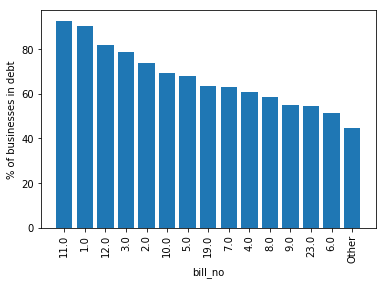

In [56]:
def show_crosstab(feat,df=combined_df4,threshold=10):
    counts = df[feat].value_counts()
    repl = counts[counts <= threshold].index
    # list of uncommon values to be created, taken by indexing the value_counts where count is sub-threshold
    df['edited']=df[feat].replace(repl, 'Other')

    ct = pd.crosstab(df['edited'], df['bin_label'])
    ct['neg_pc']=ct[0]/(ct[0]+ct[1])*100
    sorted_df = ct.sort_values('neg_pc',ascending=False)
    print(sorted_df.head())  
    
    plt.bar(range(len(ct)),(sorted_df['neg_pc']))
    plt.xticks(range(len(ct)),sorted_df.index,rotation=90)
    plt.ylabel('% of businesses in debt')
    plt.xlabel(feat)
show_crosstab('bill_no')

bin_label      0   1     neg_pc
edited                         
             155   6  96.273292
 Leisure      17   3  85.000000
 Industrial  191  53  78.278689
 Retail      326  92  77.990431
 Offices     305  98  75.682382


C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


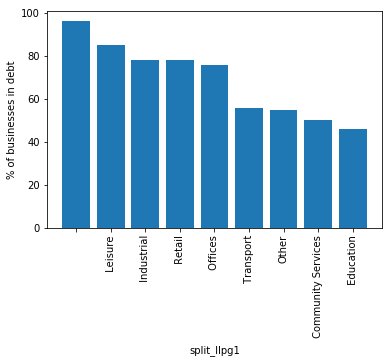

In [58]:
show_crosstab('split_llpg1')

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


bin_label                                   0   1     neg_pc
edited                                                      
                                          155   6  96.273292
 Retail- Public House / Bar / Nightclub    11   2  84.615385
 Industrial- Workshop / Light Industrial  116  27  81.118881
 Retail- Restaurant / Cafeteria            47  11  81.034483
 Retail- Shop / Showroom                  244  74  76.729560


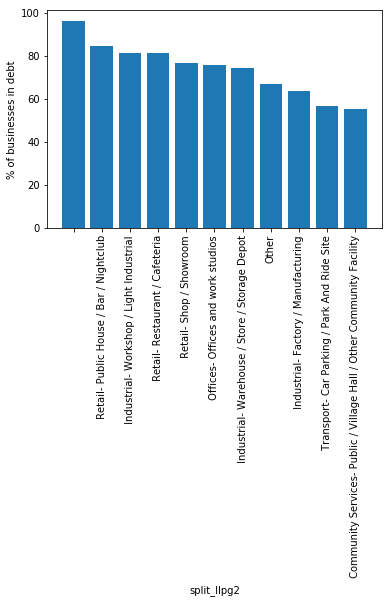

In [59]:
show_crosstab('split_llpg2')

In [60]:
show_crosstab('empty_prop')

AttributeError: 'NoneType' object has no attribute 'any'

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


bin_label            0   1     neg_pc
edited                               
SPRINGFIELD         33   4  89.189189
HACKNEY WICK        46  10  82.142857
DALSTON             81  18  81.818182
STAMFORD HILL WEST  18   4  81.818182
STOKE NEWINGTON     64  15  81.012658


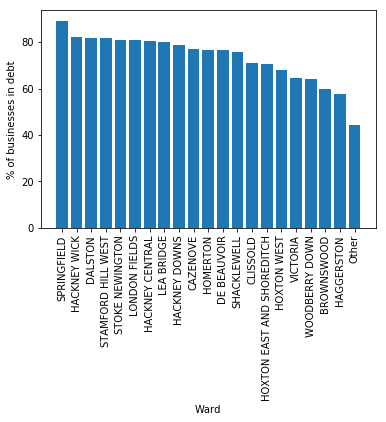

In [61]:
show_crosstab('Ward')

bin_label    0    1     neg_pc
edited                        
Other       12    2  85.714286
CSM01      922  230  80.034722
DD12         9    3  75.000000
CSH12       57   22  72.151899
DDM01       57   52  52.293578


C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


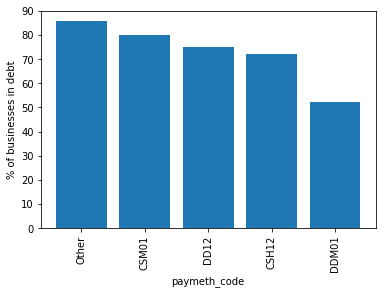

In [62]:
show_crosstab('paymeth_code')

In [63]:
combined_df4['general_paymeth']=combined_df4['paymeth_code'].apply(lambda x: 'DD' if 'DD' in x else 'CSM')
combined_df4[['paymeth_code','general_paymeth']]

C:\Users\jotaylor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,paymeth_code,general_paymeth
10,CSM01,CSM
22,CSM01,CSM
35,DDM01,DD
76,CSM01,CSM
85,CSM01,CSM
93,CSM01,CSM
96,CSM01,CSM
105,DDM01,DD
118,CSM01,CSM
129,DD12,DD


In [ ]:
show_crosstab('general_paymeth')

Too many different values for RV (rates value) so need to discretise it

In [ ]:
combined_df4['discrete_rv']=pd.cut(combined_df4['rv'],bins=range(0,2000000,10000),labels=False)
combined_df4[['rv','discrete_rv']]
# print(combined_df4['rv'].max())
# print(combined_df4['rv'].min())
# print(combined_df4['discrete_rv'].max())
# print(combined_df4['discrete_rv'].min())
combined_df4['discrete_rv'].index[combined_df4['rv'].apply(np.isnan)]
# list_of_nans=list((pd.isnull(combined_df4).any(1).nonzero()[0]))
list_of_nans=list((pd.isnull(combined_df4)))
print(list_of_nans)
combined_df4['discrete_rv'].hist(bins=100)
# plt.hist(combined_df4['discrete_rv'])
# print(combined_df4.loc[list_of_nans])#[['rv','discrete_rv']])

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)
forest.fit(X, y['bin_label'])
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("{}. \t {} {} ({:3f})".format(f + 1, feats_dict[indices[f]], ' '*(30-len(feats_dict[indices[f]])),  importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()